<a href="https://colab.research.google.com/github/rushikeshjagatap85/EDA--Capstone-project/blob/main/Rushikesh_Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.Orange S.A., formerly**
# **# Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. ¶**

# **Business Understanding Of A Telecom Industry Customer Churn:**

Customer churn is a big problem in any industry and one of the most important concerns for the Telecom industry. The effect on the revenues of the companies, because of this customer churns is huge, especially in the telecom field, that's why these companies are seeking to develop a predictive potential customer churn. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate, and it costs 5-10 times more to acquire a new customer than to retain an existing one, that's why customer retention has now become even more important than customer acquisition.

Therefore, finding those factors that increase customer churn is important to take necessary actions to reduce this churn. The main goal of our project is to develop an understanding of the cause of customer churn which assists telecom operators to predict customers who are most likely subject to churn, and what to do to retain the most valuable customer.

# Business Objective

*   Maximize: Company's profit by retaining customer
*   Minimize: Customer churn by identifying the key cause of the problem



**The main objective of the project is to :**


*   Finding factors and cause those influence customers to churn.
*   Retain churn customers by taking appropriate steps 
*   Providing offers based on affecting factors.

In [2]:
#importing the required packages
import pandas as pd
import numpy as np
#import visualization packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path='/content/drive/MyDrive/'
df=pd.read_csv(path+'Telecom Churn.csv')

# **Understand More About The Data**

In [5]:
# Viewing the data of top 5 rows to look the glimps of the data
df.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
# View the data of bottom 5 rows to look the glimps of the data
df.tail(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [7]:
#Getting the shape of dataset with rows and columns
print(df.shape)

(3333, 20)


In [8]:
#Getting all the columns
print("Features of the dataset:")
df.columns

Features of the dataset:


Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

**Breakdown of Our Features:**

**STATE:**
51 Unique States name

**Account** **Length:**
Length of The Account

**Area Code:**
Code Number of Area having some States

**International Plan:**
Yes Indicate International Plan is Present and No Indicates no subscription for Internatinal Plan

**Voice Mail Plan:**
Yes Indicates Voice Mail Plan is Present and No Indicates no subscription for Voice Mail Plan

**Number vmail messages:**
Number of Voice Mail Messages ranging from 0 to 50

**Total day minutes:**
 Total Number of Minutes Spent  in Morning

**Total day calls:**
 Total Number of Calls made  in Morning.

**Total day charge:**
 Total Charge to the Customers in Morning.

**Total eve minutes:**
Total Number of Minutes Spent  in Evening

**Total eve calls:**
 Total Number of Calls made r in Evening.

**Total eve charge:**
 Total Charge to the Customers in Morning.

**Total night minutes:**
 Total Number of Minutes Spent  in the Night.

**Total night calls:**
 Total Number of Calls made  in Night.

**Total night charge:**
 Total Charge to the Customers in Night.

 **Customer service calls**
 Number of customer service calls made by customer

 **Churn**
 Customer Churn, True means churned customer, False means retained customer

In [9]:
df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [12]:
df.describe(include= 'all')

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333,3333.000000,3333.000000,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,106,NaN,NaN,3010,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,437.182418,NaN,NaN,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,42.371290,NaN,NaN,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


In [13]:
#check for count of missing values in each column.
df.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [14]:
df.isnull().sum()
#as we see there are no missing values present in nay column.

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [15]:
# Checking Duplicate Values
len(df[df.duplicated()])

0

# **Exploratory Data Analysis Of The Data Set**

### Analyzing What The Dependent Variable Said To Us i.e 'CHURN'.

In [16]:
df["Churn"].unique()

array([False,  True])

In [17]:
#Printing the count of true and false in 'churn' feature
print(df.Churn.value_counts())

False    2850
True      483
Name: Churn, dtype: int64


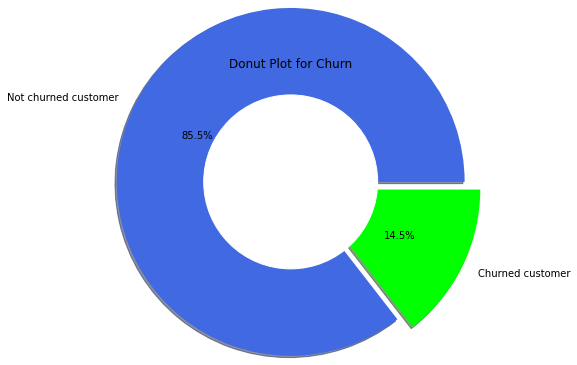

In [18]:
#To get the Donut Plot to analyze churn
data = df['Churn'].value_counts()
explode = (0, 0.2)
plt.pie(data, explode = explode,autopct='%1.1f%%',shadow=True,radius = 2.0, labels = ['Not churned customer','Churned customer'],colors=['royalblue' ,'lime'])
circle = plt.Circle( (0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut Plot for Churn')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


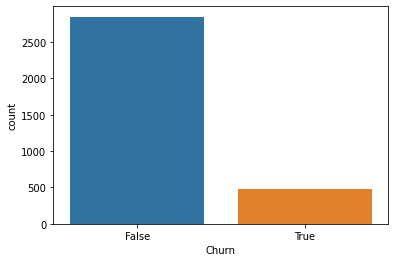

In [19]:
sns.countplot(df['Churn'])

***After analyzing the churn column, we had little to say like almost 15% of customers have churned. let's see what other features say to us and what relation we get after correlated with churn***

### **Analyzing State** **Column**

In [20]:
state=pd.crosstab(df['State'],df['Churn'])
state['state percentage']=state.apply(lambda x: x[1]*100/x[0]+x[1],axis=1)

In [21]:
state

Churn,False,True,state percentage
State,,,
AK,49,3,9.122449
AL,72,8,19.111111
AR,44,11,36.000000
AZ,60,4,10.666667
CA,25,9,45.000000
CO,57,9,24.789474
CT,62,12,31.354839
DC,49,5,15.204082
DE,52,9,26.307692


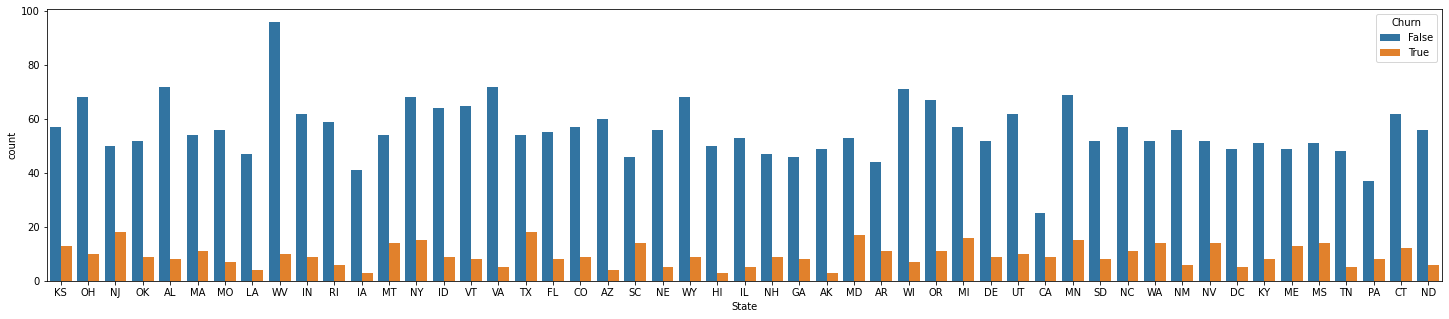

In [38]:
plt.rcParams['figure.figsize'] = [25, 5]
sns.countplot(x='State',hue='Churn',data=df)

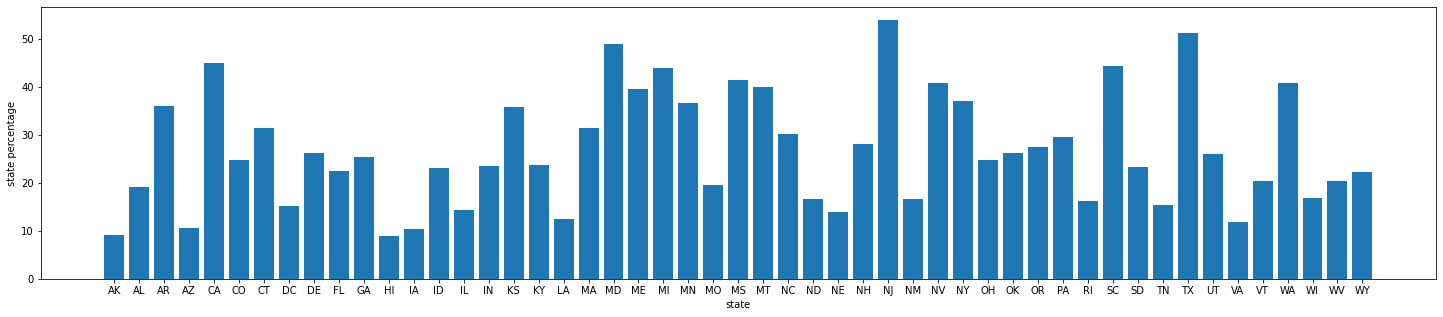

In [40]:
xtics=state.index
x=np.arange(len(xtics))
plt.bar(x,state['state percentage'])
plt.xlabel('state')
plt.ylabel('state percentage')
plt.xticks(x,xtics)
plt.show()

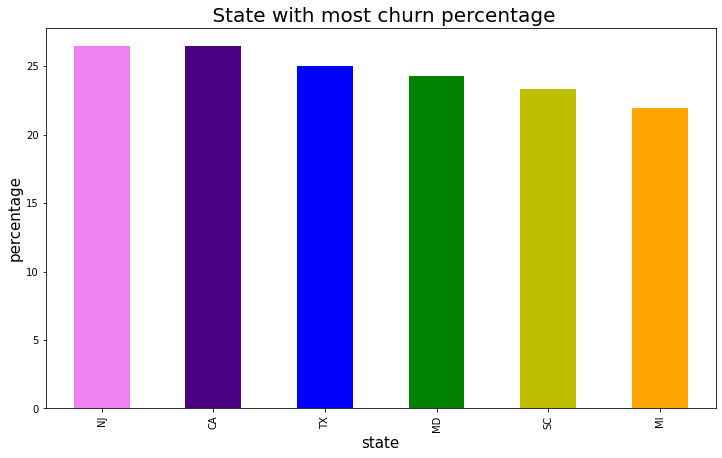

In [43]:
plt.rcParams['figure.figsize'] = (12, 7)
color = plt.cm.copper(np.linspace(0, 0.5, 20))
((df.groupby(['State'])['Churn'].mean())*100).sort_values(ascending = False).head(6).plot.bar(color = ['violet','indigo','b','g','y','orange','r'])
plt.title(" State with most churn percentage", fontsize = 20)
plt.xlabel('state', fontsize = 15)
plt.ylabel('percentage', fontsize = 15)
plt.show()

***There is 51 unique state present who have different churn rate.*** 

***From the above analysis CA, NJ, TX, MD, SC, MI are the ones who have a higher churn rate of more than 21.***

 ***The reason for this churn rate from a particular state may be due to the low coverage of the cellular network.***

### Analyzing "Area Code" column

In [41]:
areacode=pd.crosstab(df['Area code'],df['Churn'])
areacode['churn percentage']=areacode.apply(lambda x: x[1]*100/(x[0]+x[1]),axis=1)
areacode

Churn,False,True,churn percentage
Area code,,,
408,716,122,14.558473
415,1419,236,14.259819
510,715,125,14.880952


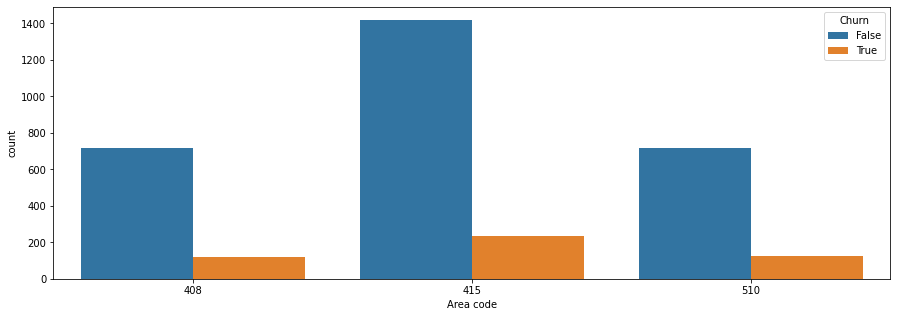

In [42]:
plt.rcParams['figure.figsize'] = [15, 5]
sns.countplot(x=df['Area code'],hue=df['Churn'])

### Analyzing "Account Length" column

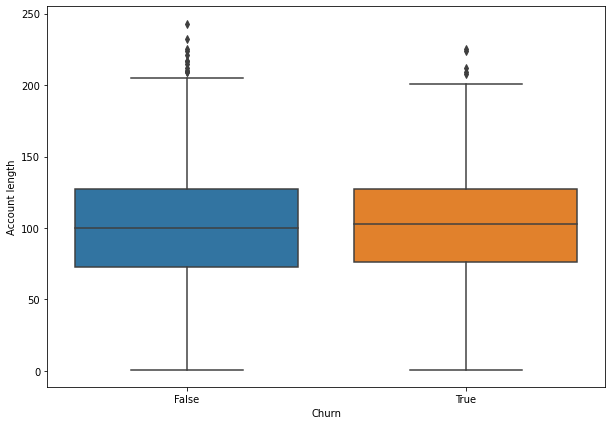

In [24]:
plt.rcParams['figure.figsize'] = [10, 7]
b=sns.boxplot(y=df['Account length'],x=df['Churn'])

### Analyzing "International Plan" column

In [25]:
#Show count value of 'yes','no'
df['International plan'].value_counts()

No     3010
Yes     323
Name: International plan, dtype: int64

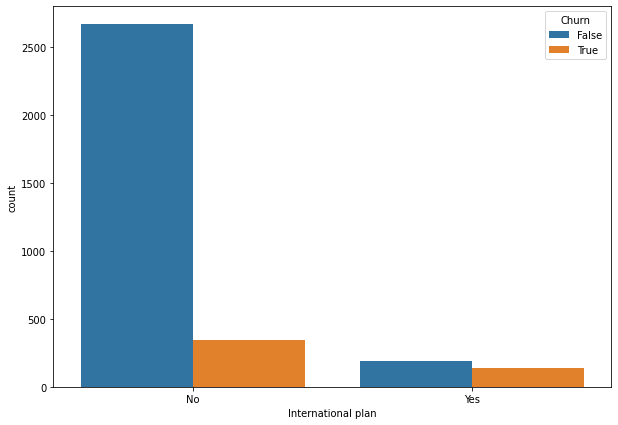

In [26]:
sns.countplot(x='International plan',hue="Churn",data = df)

### Analyzing "Voice Mail Plan" column

In [27]:
#show the unique value of the "Voice mail plan" column
df["Voice mail plan"].value_counts()

No     2411
Yes     922
Name: Voice mail plan, dtype: int64

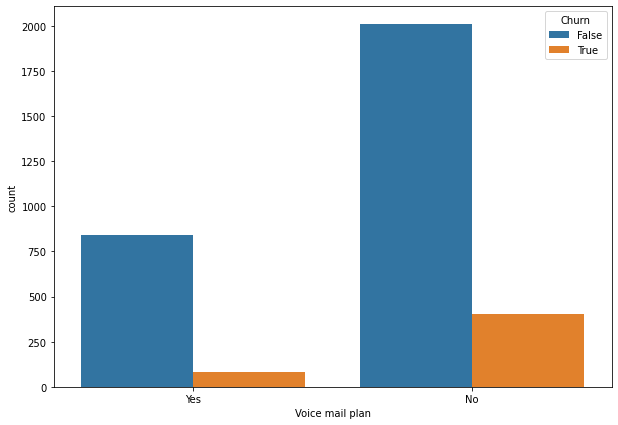

In [28]:
sns.countplot(x="Voice mail plan",hue="Churn",data = df)

### Analyzing "Number vmail messages" column

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


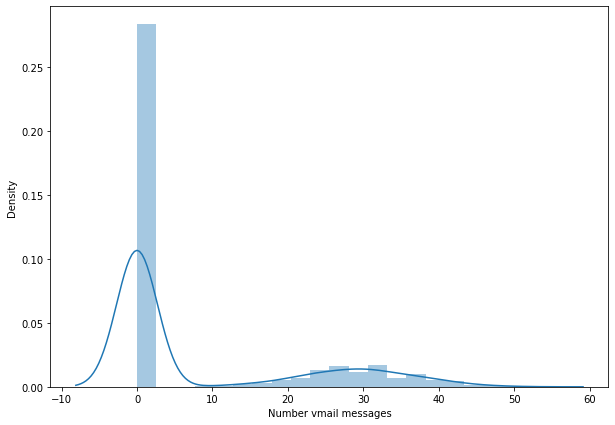

In [29]:
#Analysing by using displot diagram
sns.distplot(df['Number vmail messages'])

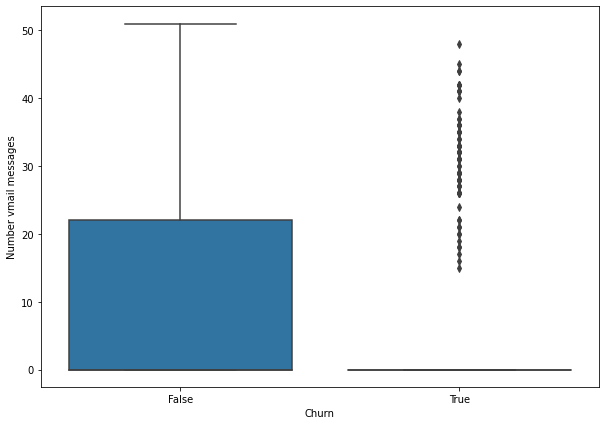

In [30]:
b=sns.boxplot(y=df['Number vmail messages'],x=df['Churn'])

### Analyzing "Customer service calls" column

In [31]:
#Printing the data of customer service calls 
cust_call=pd.crosstab(df['Customer service calls'],df['Churn'])
cust_call["churn percentage"] = cust_call.apply(lambda x: x[1]*100/(x[0]+x[1]),axis=1 )
cust_call

Churn,False,True,churn percentage
Customer service calls,,,
0,605,92,13.199426
1,1059,122,10.330229
2,672,87,11.462451
3,385,44,10.256410
4,90,76,45.783133
5,26,40,60.606061
6,8,14,63.636364
7,4,5,55.555556
8,1,1,50.000000


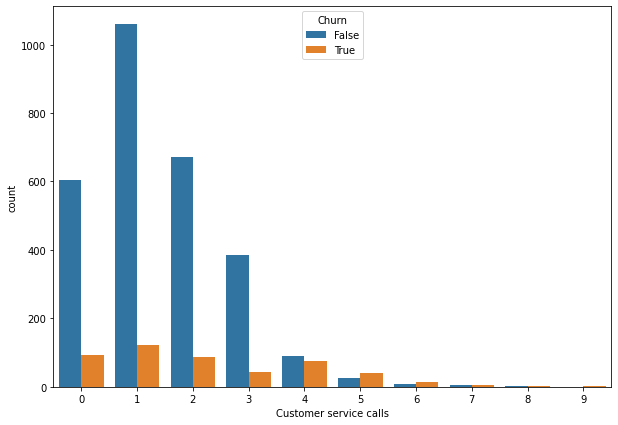

In [32]:
 #Analysing using countplot
ax=sns.countplot(x='Customer service calls',hue='Churn',data=df)

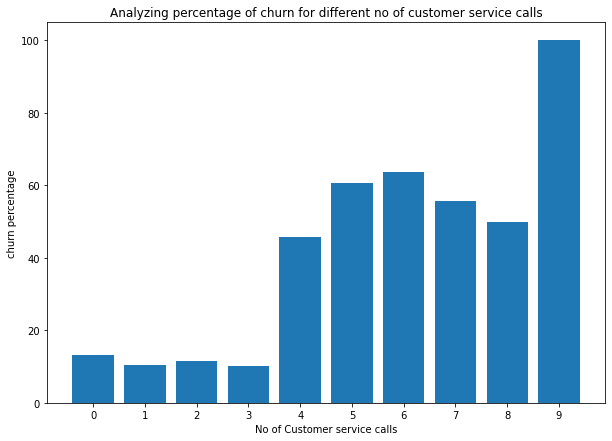

In [33]:
# Analyzing percentage of churn for different no of customer service calls
x_tics=cust_call.index
x=np.arange(len(x_tics))
plt.bar(x,cust_call["churn percentage"])
plt.xticks(x_tics)
plt.xlabel('No of Customer service calls')
plt.ylabel('churn percentage')
plt.title('Analyzing percentage of churn for different no of customer service calls')
plt.show()

### Analyzing "Total day minutes" column


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


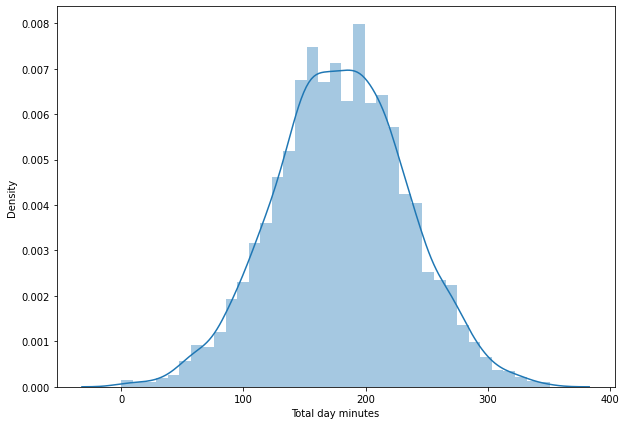

In [34]:
sns.distplot(df['Total day minutes'])

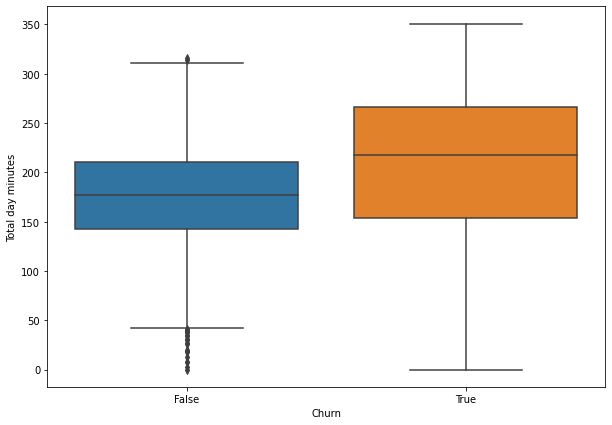

In [35]:
plt.rcParams['figure.figsize'] = [10, 7]
b=sns.boxplot(y=df['Total day minutes'],x=df['Churn'])

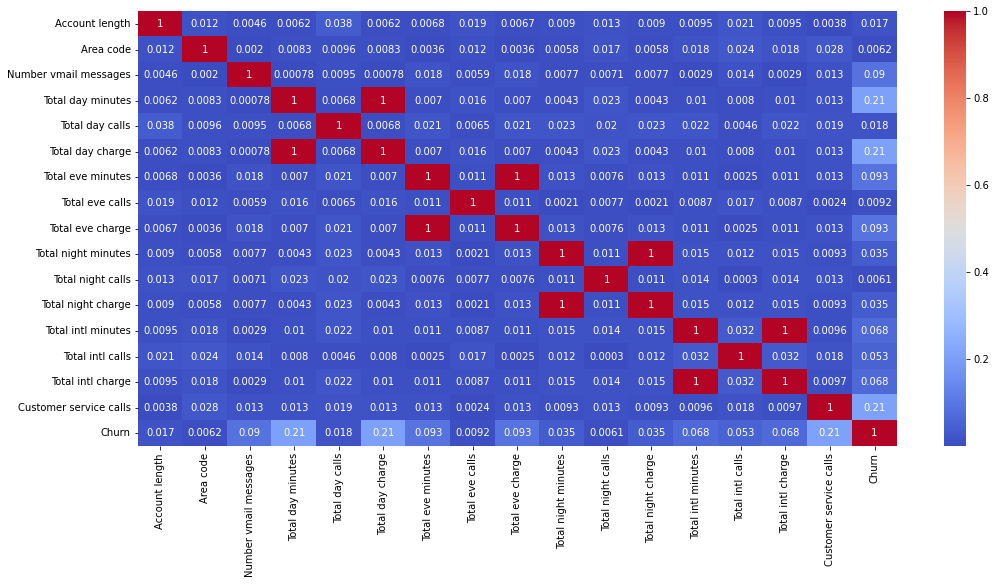

In [36]:
## plot the Correlation matrix
plt.figure(figsize=(17,8))
correlation=df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')